In [17]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
movies = pd.read_csv('laptop.csv')
ratings = pd.read_csv('ratings.csv')

In [19]:
movies.head()

,laptop_id,laptop_title,genres
0,1,Notebook 14-df0008nx,core i3|4 GB ram|1 TB HDD|GTX 1660
1,2,IdeaPad 330S-14IKB,core i5|4 GB ram|500 GB HDD|GTX 1030
2,3,MateBook D Volta,core i7|8 GB ram|1 TB HDD|GTX 1050 ti
3,4,Inspiron 15 3567,core i3|4 GB ram|1TB HDD|GTX 730
4,5,VivoBook 15 X510UR,core i5|8 GB ram|500 GB HDD|intel HD Graphics


In [20]:
ratings.head()

,userId,laptop_id,rating,timestamp
0,1,91,4.0,964982703
1,1,153,4.0,964981247
2,1,167,4.0,964982224
3,1,203,5.0,964983815
4,1,135,5.0,964980868


In [21]:
final_dataset = ratings.pivot(index='laptop_id',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5
laptop_id,,,,,
2,4.0,NaN,NaN,1.0,5.0
4,4.0,NaN,NaN,3.0,NaN
5,5.0,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,4.0,NaN
7,4.0,NaN,NaN,3.0,NaN


In [22]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5
laptop_id,,,,,
2,4.0,0.0,0.0,1.0,5.0
4,4.0,0.0,0.0,3.0,0.0
5,5.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,4.0,0.0
7,4.0,0.0,0.0,3.0,0.0


In [24]:
no_user_voted = ratings.groupby('laptop_id')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

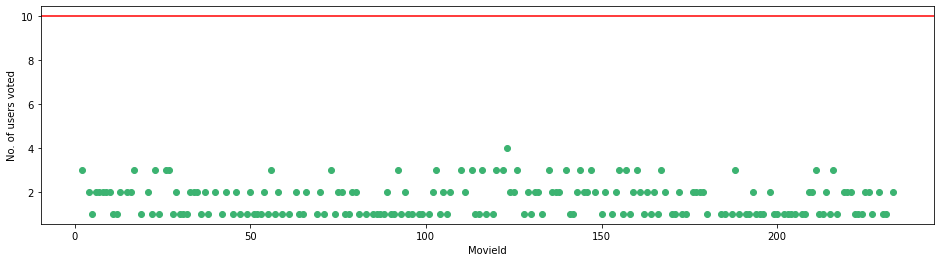

In [25]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [26]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]